<a href="https://colab.research.google.com/github/sriram942004/goldpriceprdection/blob/main/goldprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor



In [5]:
from sklearn import metrics


Data collection


In [6]:
#loading data set

In [7]:
gold_data = pd.read_csv('/content/drive/MyDrive/goldprediction/gld_price_data.csv')

In [8]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [9]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [10]:
gold_data.shape

(2290, 6)

In [11]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [12]:
gold_data.isnull()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2285,False,False,False,False,False,False
2286,False,False,False,False,False,False
2287,False,False,False,False,False,False
2288,False,False,False,False,False,False


In [13]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


correlation:
postive
negative

In [14]:
correlation = gold_data.corr()

<ipython-input-14-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

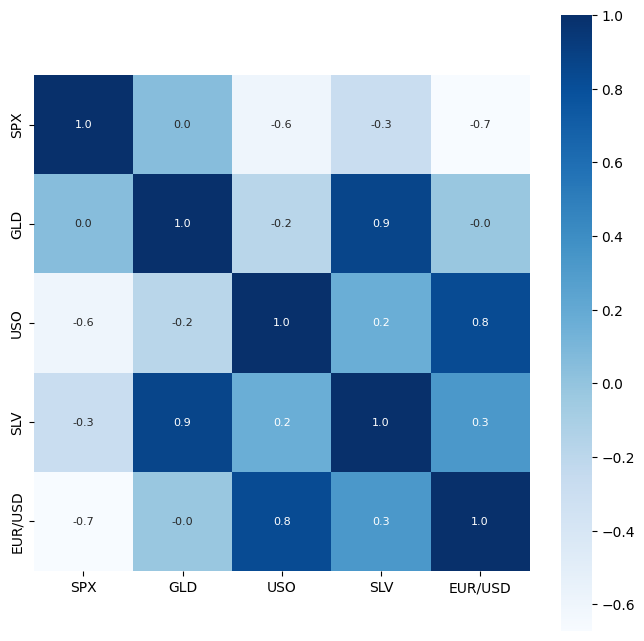

In [15]:
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')


In [16]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


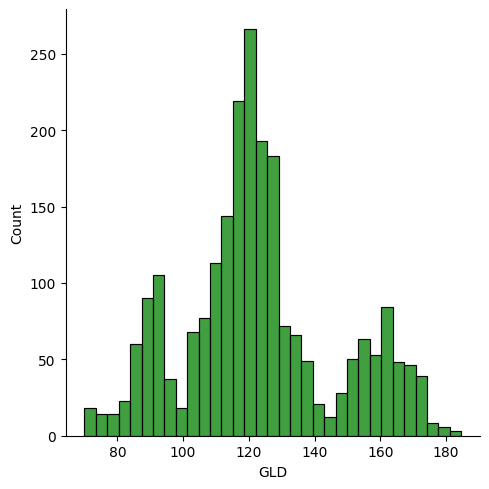

In [17]:
sns.displot(gold_data['GLD'],color='green')

Spliiting the features and Target

In [18]:
 X = gold_data.drop(['Date','GLD'],axis=1)
 Y = gold_data['GLD']

In [19]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [20]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splinting into train and test data

In [21]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state=2)

Model Training using random forest regressor

In [22]:
regressor = RandomForestRegressor(n_estimators=100)

In [23]:
#train the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [24]:
#predict on test data
test_data_prediction = regressor.predict(X_test)

In [25]:
print(test_data_prediction)

[168.76919982  81.89529984 115.93219998 127.45530078 120.66290157
 154.74599773 150.14979854 126.22050033 117.4688989  125.91450102
 116.46210099 170.58670027 141.97369873 167.78719815 115.19110014
 117.4876003  138.48500304 170.44600119 159.89620253 160.1789991
 155.27700053 125.46430021 175.5153991  157.02000292 125.20970012
  93.78380001  77.53949991 120.44900002 119.14899955 167.43599914
  88.10460043 125.15609963  90.99080085 117.82299998 121.17669914
 136.70940114 115.49660091 115.17050101 147.1290996  107.10060076
 103.87940234  87.12279787 126.51940028 117.7986     153.00419896
 119.68300004 108.31589996 108.19309882  93.35980071 127.10279788
  75.12830013 113.54559917 121.44770021 111.2055992  118.80169869
 121.117299   159.18019996 169.10700089 147.03779691  85.84399861
  94.32480045  86.92109867  90.47270004 119.15560073 126.37090007
 127.51680006 170.96750069 122.29779961 117.45349874  98.41810029
 168.64490163 142.95389824 131.87460248 121.40210232 121.60899939
 119.592100

In [26]:
# R squre error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R square error:", error_score)

R square error: 0.9898131320319637


Compare the actual value and predction value

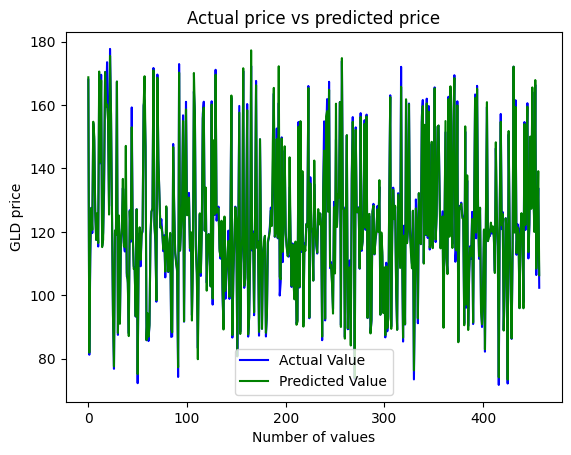

In [27]:
Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual price vs predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()

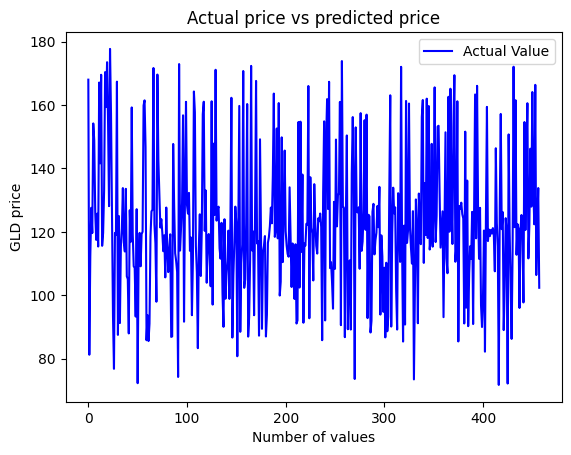

In [28]:
Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label='Actual Value')
#plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual price vs predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()

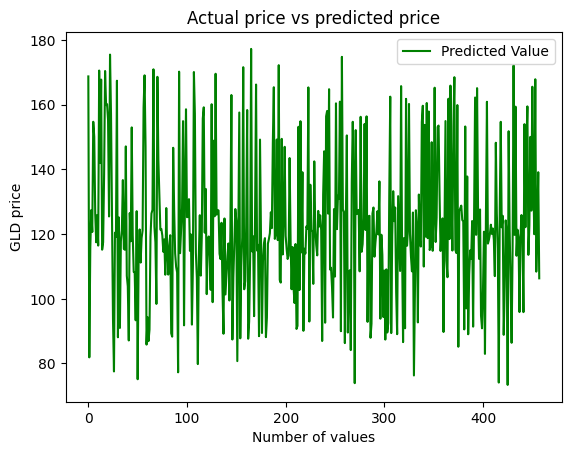

In [29]:
Y_test = list(Y_test)
#plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual price vs predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()